# 1. Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm 
from __future__ import print_function
from patsy import dmatrices


from statsmodels.formula.api import ols

# 2. Loading data

In [150]:
data = pd.read_csv("loans.csv")
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

# 3. Data Preparation

In [64]:
data.shape

(9578, 14)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We can observe there are no missing values.

# Exploratory Data Analysis

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


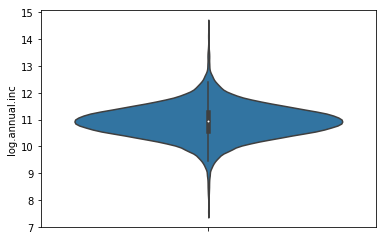

In [5]:
sns.violinplot(y='log.annual.inc',hue='not.fully.paid',data=data)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


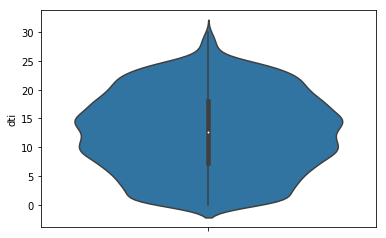

In [6]:
sns.violinplot(y='dti',hue='not.fully.paid',data=data)

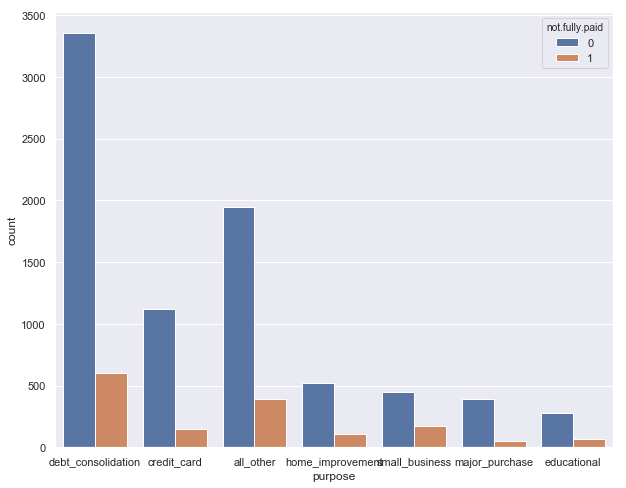

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data=data,x='purpose',hue='not.fully.paid')

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


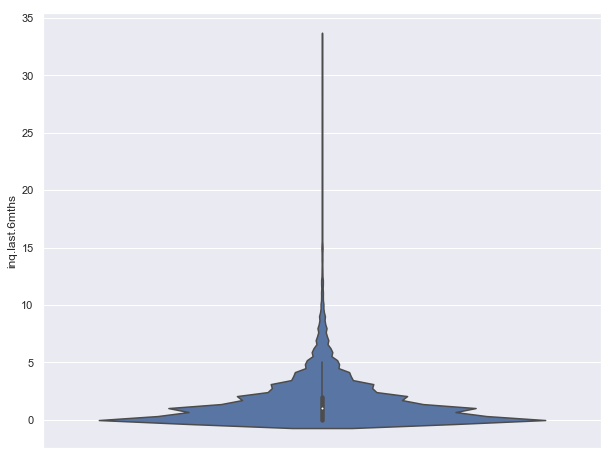

In [8]:
sns.violinplot(y='inq.last.6mths',hue='not.fully.paid',data=data)

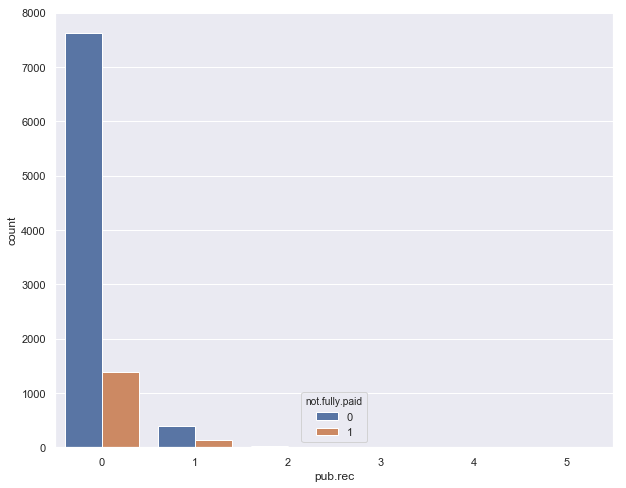

In [9]:
sns.countplot(x='pub.rec',hue='not.fully.paid',data=data)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

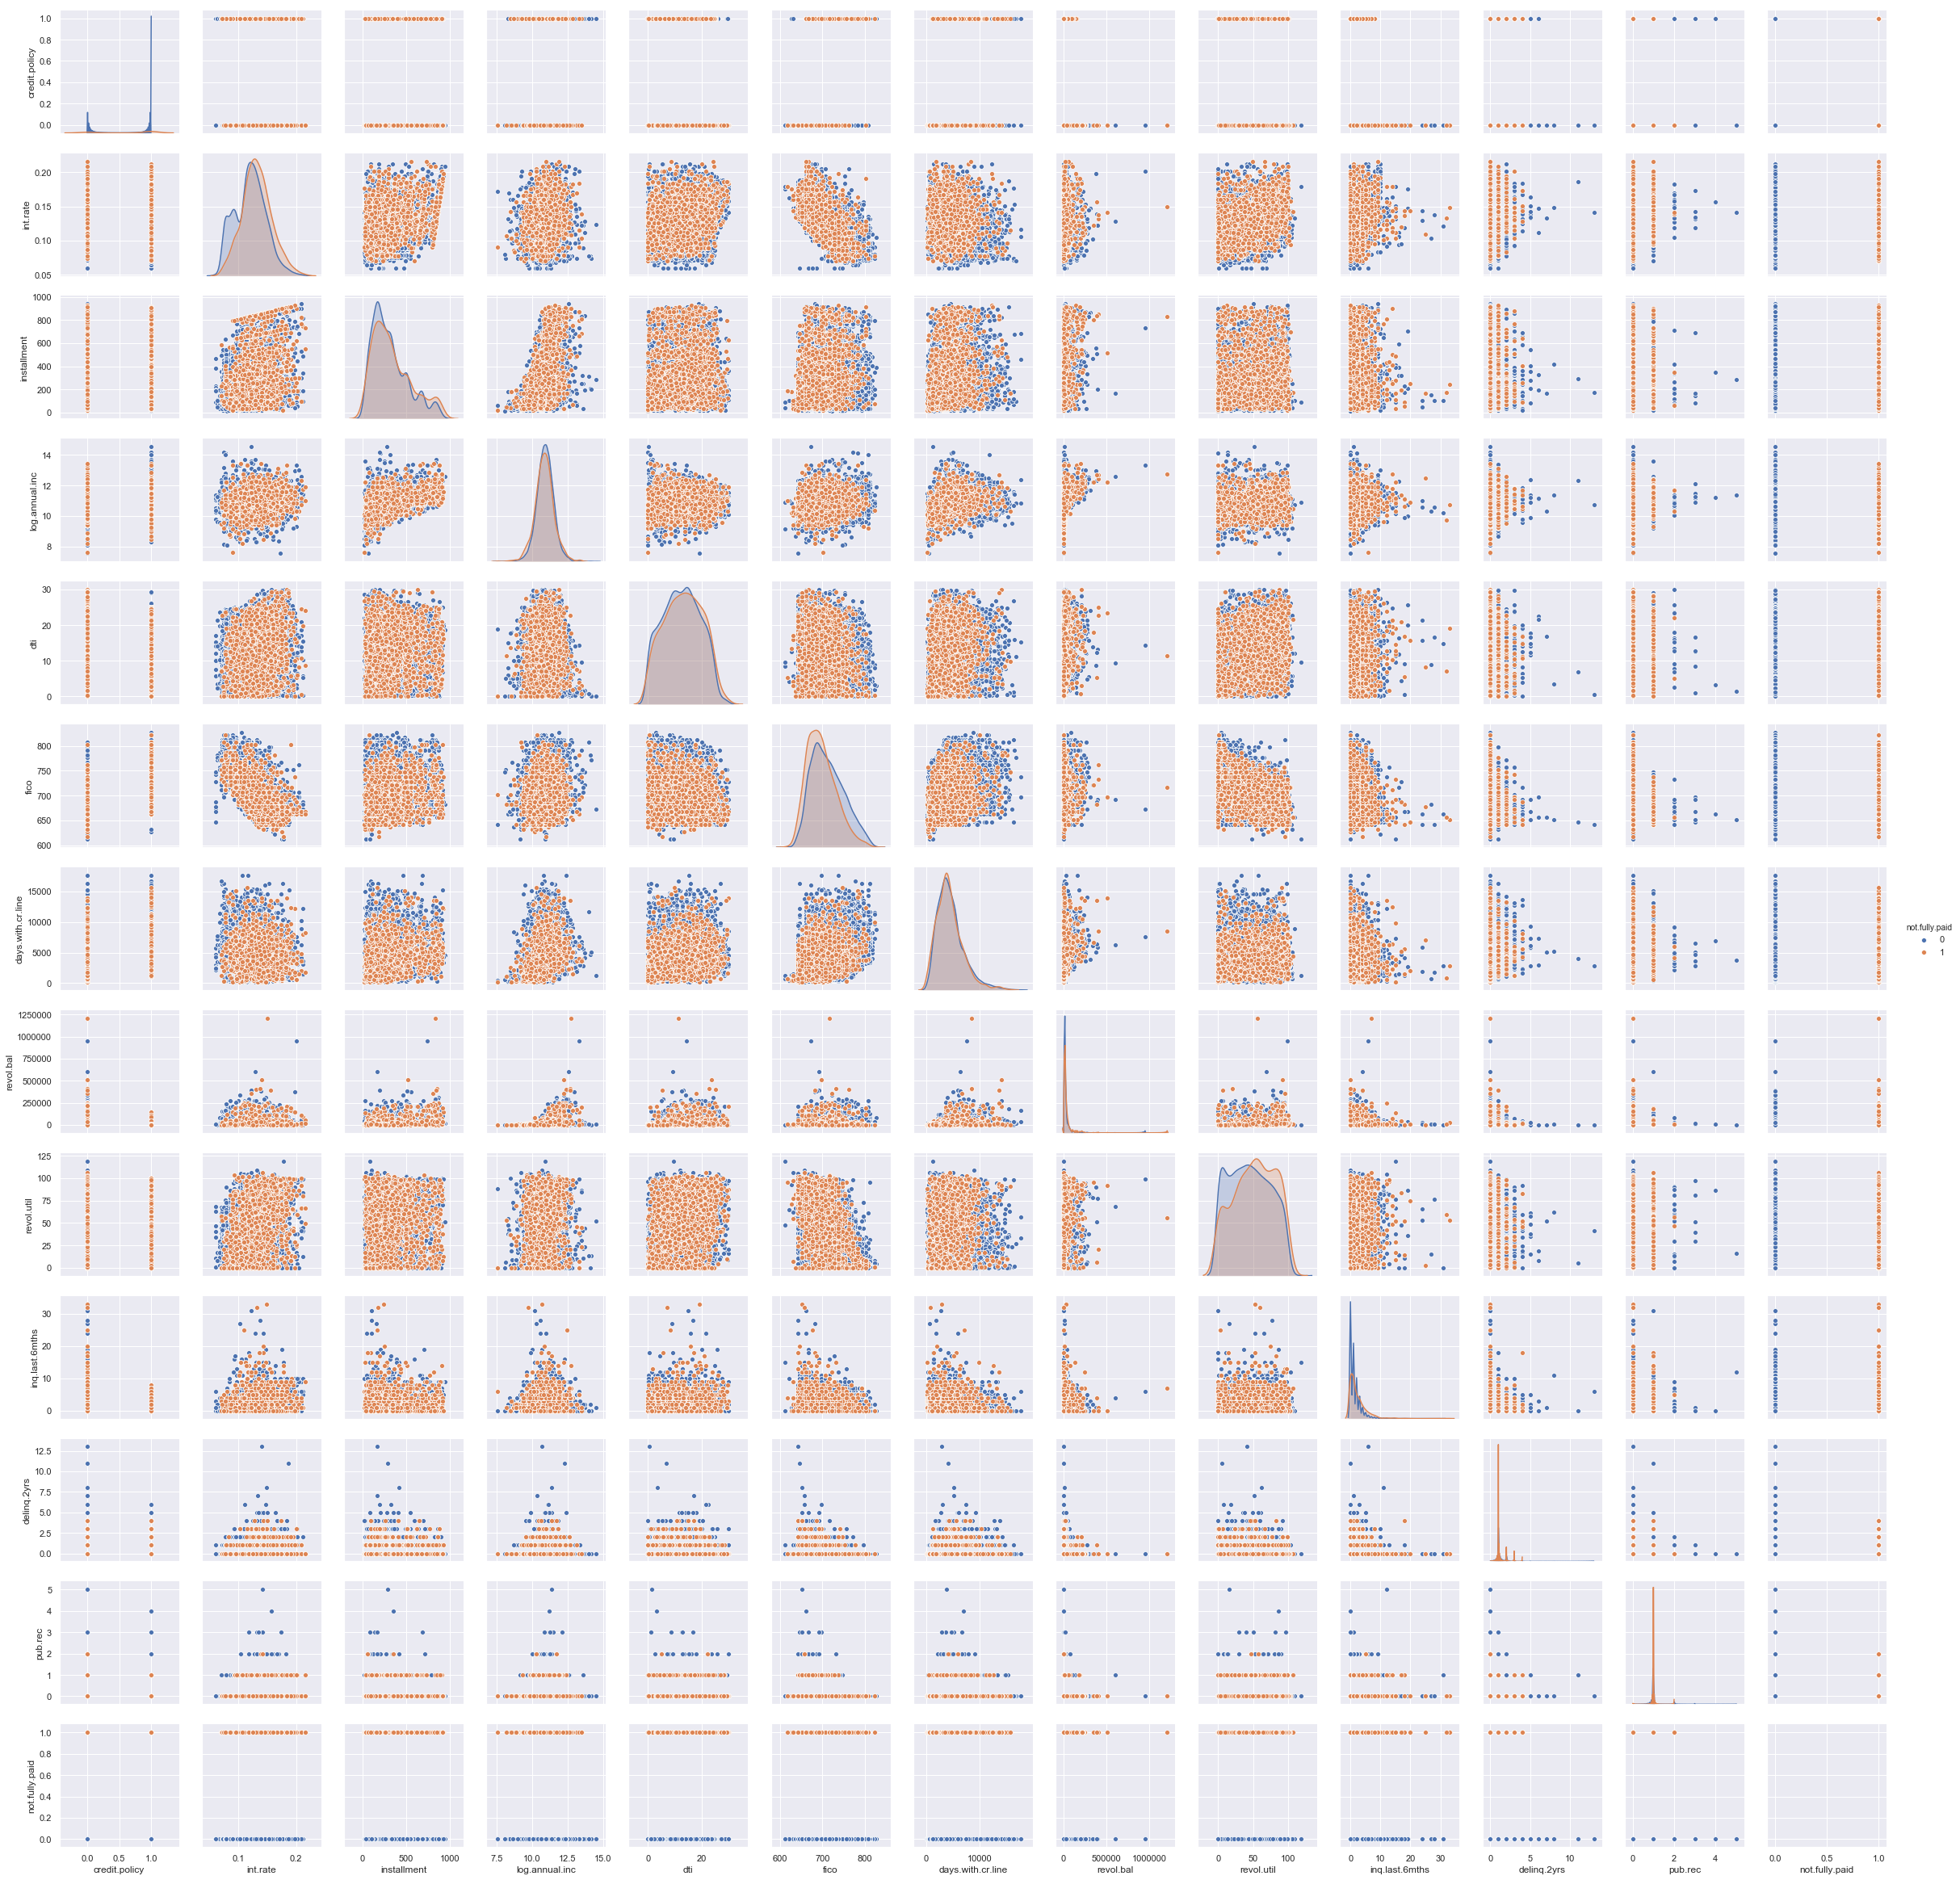

In [10]:
#pair plot
sns.pairplot(data=data, hue='not.fully.paid')

# 3.1 Statistical Summary

In [11]:
#Here we are looking for description of the object variables seperatly
data.describe(include=['object'])

purpose
count                 9578
unique                   7
top     debt_consolidation
freq                  3957

In [12]:
#Looking for cataegories in the purpose column
data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [13]:
data.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

# 3.2 Spliting Target Variable
Here the Target Variable is separated from data and the distribution is checked.

In [14]:
target = data['not.fully.paid']

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


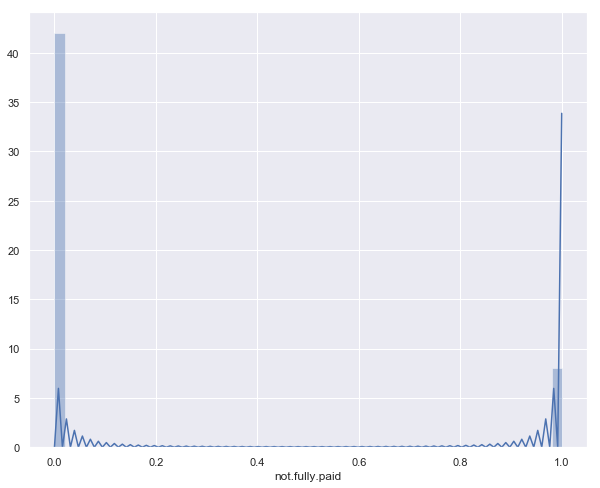

In [15]:
# Visualizing the distribution of not.fully.paid(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

In [16]:
# drop target variable from dataset
data = data.drop(["not.fully.paid"], axis=1)
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            1        0

# Dummy Coding for Categorical Variables

In [17]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data,drop_first=True)

In [18]:
data_cat_dummies.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_credit_card  purpose_debt_consolidation  \
0        0                    0                           1   
1        0                    1                           0   
2        0                    0                           1   
3        0                    0                           1   
4        0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

# Check Correlation

In [21]:
data.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   

                        dti      fico  days.with.cr.line  revol.bal  \
credit.policy     -0.090901  0.348319           0.099026  -0.187518   
int.rate           0.220006 -0.714821          -0.124022   0.092527   
installment        0.050202  0.086039           0.183297   0.233625   
log.annual.inc    -0.054065  0.114576           0.336896   0.372140   
dti                1.000000 -0.241191           0.060101   0.188748   
fico              -0.241191  1.000000           0.263880  -0.015553   
days.with.cr.line  0.060101  0.263880           1.000000   0.229344   
revol.bal          0.188748 -0.015553           0.229344   1.000000   
revol.util         0.337109 -0.541289          -0.024239   0.203779   
inq.last.6mths     0.029189 -0.185293          -0.041736   0.022394   
delinq.2yrs       -0.021792 -0.216340           0.081374  -0.033243   
pub.rec            0.006209 -0.147592           0.071826  -0.031010   

                   revol.util  inq.last.6mths  delinq.2yrs   pub.rec  
credit.policy       -0.104095       -0.535511    -0.076318 -0.054243  
int.rate             0.464837        0.202780     0.156079  0.098162  
installment          0.081356       -0.010419    -0.004368 -0.032760  
log.annual.inc       0.054881        0.029171     0.029203  0.016506  
dti                  0.337109        0.029189    -0.021792  0.006209  
fico                -0.541289       -0.185293    -0.216340 -0.147592  
days.with.cr.line   -0.024239       -0.041736     0.081374  0.071826  
revol.bal            0.203779        0.022394    -0.033243 -0.031010  
revol.util           1.000000       -0.013880    -0.042740  0.066717  
inq.last.6mths      -0.013880        1.000000     0.021245  0.072673  
delinq.2yrs         -0.042740        0.021245     1.000000  0.009184  
pub.rec              0.066717        0.072673     0.009184  1.000000

Text(0.5,1,'Correlation between features')

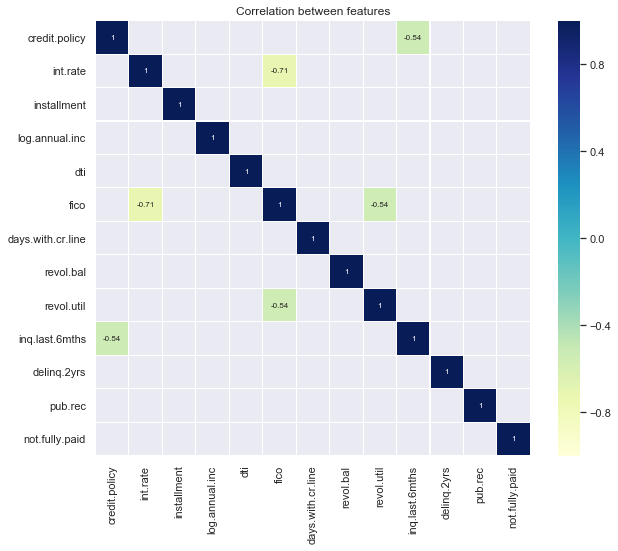

In [152]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data.corr()
plt.figure()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

# Logistic Regression Modeling

# Q1.Spliting the dataset into Train & Test
We can split the dataset with different ratios but with more weightage to training and less to test so that machine can learn with more data.
Here im using train_test_split function from sklearn model_selection.

In [30]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data_cat_dummies, target, test_size = 0.25, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (6704, 13)
x_test  (2874, 13)
y_train  (7183,)
y_test  (2395,)


## Mean Normalisation
Here we are normalising X train and X test seperatly so that its mean value doesnt influence each other

In [37]:
X_train = ((X_train - X_train.mean())/(X_train.max() - X_train.min()))
X_train.describe()

credit.policy      int.rate   installment  log.annual.inc  \
count   7.183000e+03  7.183000e+03  7.183000e+03    7.183000e+03   
mean   -1.349177e-16 -1.035542e-14 -4.570802e-16   -3.178281e-15   
std     3.949706e-01  1.718598e-01  2.272967e-01    8.859289e-02   
min    -8.066268e-01 -3.997953e-01 -3.342609e-01   -4.821712e-01   
25%     1.933732e-01 -1.229411e-01 -1.708667e-01   -5.338235e-02   
50%     1.933732e-01 -2.736463e-03 -5.597216e-02   -1.156796e-03   
75%     1.933732e-01  1.072380e-01  1.260196e-01    5.389484e-02   
max     1.933732e-01  6.002047e-01  6.657391e-01    5.178288e-01   

                dti          fico  days.with.cr.line     revol.bal  \
count  7.183000e+03  7.183000e+03       7.183000e+03  7.183000e+03   
mean   7.454148e-16 -1.548408e-16       2.777342e-16 -8.381397e-19   
std    2.298444e-01  1.760459e-01       1.534191e-01  2.900053e-02   
min   -4.173549e-01 -4.608653e-01      -2.670015e-01 -1.410942e-02   
25%   -1.801262e-01 -1.352839e-01      -1.067317e-01 -1.149255e-02   
50%    1.009014e-03 -1.900482e-02      -2.823464e-02 -7.047724e-03   
75%    1.776367e-01  1.205301e-01       7.175095e-02  9.913102e-04   
max    5.826451e-01  5.391347e-01       7.329985e-01  9.858906e-01   

         revol.util  inq.last.6mths   delinq.2yrs       pub.rec  \
count  7.183000e+03    7.183000e+03  7.183000e+03  7.183000e+03   
mean  -6.805738e-16    2.999625e-17 -1.459940e-17  4.133100e-17   
std    2.666541e-01    6.686770e-02  4.279464e-02  5.369497e-02   
min   -4.293622e-01   -4.790351e-02 -1.274376e-02 -1.278018e-02   
25%   -2.243990e-01   -4.790351e-02 -1.274376e-02 -1.278018e-02   
50%   -5.648972e-03   -1.760048e-02 -1.274376e-02 -1.278018e-02   
75%    2.222922e-01    1.270255e-02 -1.274376e-02 -1.278018e-02   
max    5.706378e-01    9.520965e-01  9.872562e-01  9.872198e-01   

       purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
count         7.183000e+03                7.183000e+03         7.183000e+03   
mean         -6.211097e-16                5.198712e-16         1.656061e-16   
std           3.422367e-01                4.915581e-01         1.854031e-01   
min          -1.354587e-01               -4.083252e-01        -3.563970e-02   
25%          -1.354587e-01               -4.083252e-01        -3.563970e-02   
50%          -1.354587e-01               -4.083252e-01        -3.563970e-02   
75%          -1.354587e-01                5.916748e-01        -3.563970e-02   
max           8.645413e-01                5.916748e-01         9.643603e-01   

       purpose_home_improvement  purpose_major_purchase  \
count              7.183000e+03            7.183000e+03   
mean               1.614599e-16            1.014645e-16   
std                2.468143e-01            2.099764e-01   
min               -6.515384e-02           -4.622024e-02   
25%               -6.515384e-02           -4.622024e-02   
50%               -6.515384e-02           -4.622024e-02   
75%               -6.515384e-02           -4.622024e-02   
max                9.348462e-01            9.537798e-01   

       purpose_small_business  
count            7.183000e+03  
mean             6.913198e-17  
std              2.450891e-01  
min             -6.417931e-02  
25%             -6.417931e-02  
50%             -6.417931e-02  
75%             -6.417931e-02  
max              9.358207e-01

In [38]:
X_test = ((X_test - X_test.mean())/(X_test.max() - X_test.min()))
X_test.describe()

credit.policy      int.rate   installment  log.annual.inc  \
count   2.395000e+03  2.395000e+03  2.395000e+03    2.395000e+03   
mean    6.063347e-17 -3.872626e-15  3.962963e-16    1.823172e-15   
std     4.000835e-01  1.710609e-01  2.239036e-01    1.001860e-01   
min    -8.000000e-01 -4.026611e-01 -3.244488e-01   -5.448327e-01   
25%     2.000000e-01 -1.219706e-01 -1.682728e-01   -6.270697e-02   
50%     2.000000e-01 -4.872149e-04 -5.270391e-02    1.618499e-03   
75%     2.000000e-01  1.158811e-01  1.212228e-01    6.241922e-02   
max     2.000000e-01  5.973389e-01  6.755512e-01    4.551673e-01   

                dti          fico  days.with.cr.line     revol.bal  \
count  2.395000e+03  2.395000e+03       2.395000e+03  2.395000e+03   
mean   3.537648e-16  2.423253e-17       3.661186e-16 -4.032960e-18   
std    2.295003e-01  1.825196e-01       1.376728e-01  7.381520e-02   
min   -4.314848e-01 -4.672731e-01      -2.479747e-01 -4.117659e-02   
25%   -1.793153e-01 -1.339398e-01      -9.672212e-02 -3.310824e-02   
50%    4.763484e-03 -1.489214e-02      -2.112149e-02 -1.931268e-02   
75%    1.766593e-01  1.279650e-01       6.821570e-02  4.251722e-03   
max    5.685152e-01  5.327269e-01       7.520253e-01  9.588234e-01   

         revol.util  inq.last.6mths   delinq.2yrs       pub.rec  \
count  2.395000e+03    2.395000e+03  2.395000e+03  2.395000e+03   
mean  -5.300098e-16   -8.503404e-19  3.703834e-17  4.245908e-17   
std    2.439190e-01    7.036773e-02  8.579223e-02  1.210324e-01   
min   -3.954038e-01   -5.056233e-02 -2.630480e-02 -2.839248e-02   
25%   -2.012861e-01   -5.056233e-02 -2.630480e-02 -2.839248e-02   
50%   -2.126454e-03   -1.830426e-02 -2.630480e-02 -2.839248e-02   
75%    2.003946e-01    1.395380e-02 -2.630480e-02 -2.839248e-02   
max    6.045962e-01    9.494377e-01  9.736952e-01  9.716075e-01   

       purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
count         2.395000e+03                2.395000e+03         2.395000e+03   
mean          5.537208e-17               -1.240019e-16        -8.181811e-18   
std           3.258091e-01                4.948276e-01         1.871383e-01   
min          -1.206681e-01               -4.275574e-01        -3.632568e-02   
25%          -1.206681e-01               -4.275574e-01        -3.632568e-02   
50%          -1.206681e-01               -4.275574e-01        -3.632568e-02   
75%          -1.206681e-01                5.724426e-01        -3.632568e-02   
max           8.793319e-01                5.724426e-01         9.636743e-01   

       purpose_home_improvement  purpose_major_purchase  \
count              2.395000e+03            2.395000e+03   
mean              -4.366723e-17            6.775489e-17   
std                2.504608e-01            2.047847e-01   
min               -6.722338e-02           -4.384134e-02   
25%               -6.722338e-02           -4.384134e-02   
50%               -6.722338e-02           -4.384134e-02   
75%               -6.722338e-02           -4.384134e-02   
max                9.327766e-01            9.561587e-01   

       purpose_small_business  
count            2.395000e+03  
mean            -9.915520e-17  
std              2.482828e-01  
min             -6.597077e-02  
25%             -6.597077e-02  
50%             -6.597077e-02  
75%             -6.597077e-02  
max              9.340292e-01

# Q2. Logistic regression with all independent variables

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
all_var=model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.838830897703549


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Q3. Checking for significant independent variables

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.675841
         Iterations 5
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    -0.535   
Dependent Variable:     not.fully.paid      AIC:                 9745.1277
Date:                   2018-12-04 15:39    BIC:                 9868.9582
No. Observations:       7183                Log-Likelihood:      -4854.6  
Df Model:               17                  LL-Null:             -3162.7  
Df Residuals:           7165                LLR p-value:         1.0000   
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         5.0000                                            
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
credit.policy              -

The following feaetures are having more tha 0.05 p-values so we can remove them. int.rate, dti,  days.with.cr.line, revol.util,delinq.2yrs,purpose_educational,purpose_home_improvement ,purpose_major_purchase

### Model 2

In [48]:
cols=['credit.policy', 'installment', 'log.annual.inc', 'fico', 'revol.bal', 'inq.last.6mths', 'pub.rec', 
      'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_small_business'] 
X=X_train[cols]
y=y_train

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.676406
         Iterations 5
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    -0.536   
Dependent Variable:     not.fully.paid      AIC:                 9737.2466
Date:                   2018-12-04 15:45    BIC:                 9806.0413
No. Observations:       7183                Log-Likelihood:      -4858.6  
Df Model:               9                   LL-Null:             -3162.7  
Df Residuals:           7173                LLR p-value:         1.0000   
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         5.0000                                            
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
credit.policy              -

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


Here we can observe a increase in Accuracy than previous model

#### or we can use directly stepwise selection to get varibles which has less than 0.05 p-values 

In [66]:
def stepwise_selection(X_train, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  credit.policy                  with p-value 9.12399e-46
Add  fico                           with p-value 2.14029e-17
Add  inq.last.6mths                 with p-value 3.28106e-11
Add  purpose_small_business         with p-value 1.24607e-09
Add  installment                    with p-value 0.00011515
Add  log.annual.inc                 with p-value 7.92353e-08
Add  revol.bal                      with p-value 0.00142848
Add  purpose_credit_card            with p-value 0.000941776
Add  purpose_debt_consolidation     with p-value 1.07562e-05
Add  pub.rec                        with p-value 0.00464556
resulting features:


# Q4.Dummy variables
we already created dummy variables to fit a logistic regression by creating new columns of 0's and 1's for categorical features using dummy function.

For 4 categorical variables it will create 4 new columns of 0's and 1's. Whichever the row has that category will become 1 in that column.

The logit in logistic regression is a special case of a link function in a generalized linear model: it is the canonical link function for the Bernoulli distribution.It will find probablity and according to threshold it will categorise the feature.

# Q5. Probability of the test set loans not being paid back in full

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1802    5]
 [ 341    7]]


    Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 7

True Negatives (TN): we correctly predicted that they don't have diabetes 1802

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 5
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 341
Falsely predict negative Type II error

In [153]:
341/(341+7)

0.9798850574712644

# Q6.The accuracy of the logistic regression model is

In [77]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


# Q7.Sensitivity, Specificity and Precision of a classification Model

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1807
           1       0.58      0.02      0.04       348

   micro avg       0.84      0.84      0.84      2155
   macro avg       0.71      0.51      0.48      2155
weighted avg       0.80      0.84      0.77      2155



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

Sensitivity and specificity are statistical measures of the performance of a binary classification test

sensitivity, recall, hit rate, or true positive rate (TPR)
tp/(tp+fn)

measures the proportion of actual positives which are correctly identified

In [82]:
7/(7+341)

0.020114942528735632

specificity, selectivity or true negative rate (TNR)=tn(tn+fp)

measures the proportion of negatives which are correctly identified

In [83]:
1802/(1802+5)

0.9972329828444937

# Q8. ROC curve

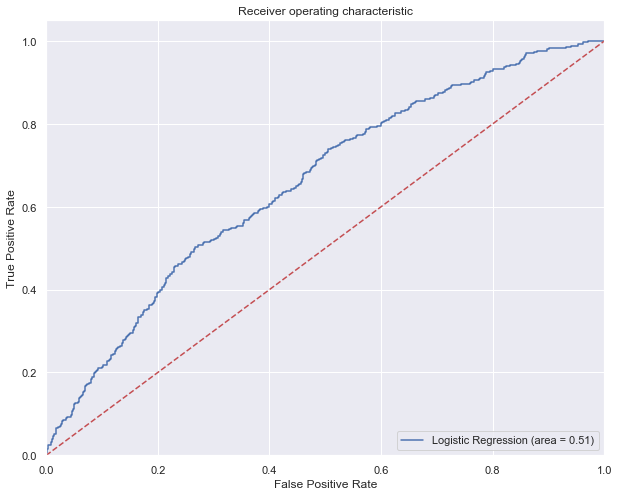

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Linear Regression

## Temperature effect of global warming

In [84]:
data = pd.read_csv("GlobalWarming.csv")
data.head()

Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149

In [85]:
#checking any null values are there.oops there's no null values
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [86]:
#checking the datatypes
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [87]:
#shape of the dataframe
data.shape

(308, 11)

In [88]:
#summary statistics
data.describe()

Year       Month         MEI         CO2          CH4  \
count   308.000000  308.000000  308.000000  308.000000   308.000000   
mean   1995.662338    6.551948    0.275555  363.226753  1749.824513   
std       7.423197    3.447214    0.937918   12.647125    46.051678   
min    1983.000000    1.000000   -1.635000  340.170000  1629.890000   
25%    1989.000000    4.000000   -0.398750  353.020000  1722.182500   
50%    1996.000000    7.000000    0.237500  361.735000  1764.040000   
75%    2002.000000   10.000000    0.830500  373.455000  1786.885000   
max    2008.000000   12.000000    3.001000  388.500000  1814.180000   

              N2O      CFC-11      CFC-12          TSI    Aerosols        Temp  
count  308.000000  308.000000  308.000000   308.000000  308.000000  308.000000  
mean   312.391834  251.973068  497.524782  1366.070759    0.016657    0.256776  
std      5.225131   20.231783   57.826899     0.399610    0.029050    0.179090  
min    303.677000  191.324000  350.113000  1365.426100    0.001600   -0.282000  
25%    308.111500  246.295500  472.410750  1365.717050    0.002800    0.121750  
50%    311.507000  258.344000  528.356000  1365.980900    0.005750    0.248000  
75%    316.979000  267.031000  540.524250  1366.363250    0.012600    0.407250  
max    322.182000  271.494000  543.813000  1367.316200    0.149400    0.739000

In [89]:
##corr table
data.corr()

Year     Month       MEI       CO2       CH4       N2O  \
Year      1.000000 -0.025789 -0.145345  0.985379  0.910563  0.994850   
Month    -0.025789  1.000000 -0.016345 -0.096287  0.017558  0.012395   
MEI      -0.145345 -0.016345  1.000000 -0.152911 -0.105555 -0.162375   
CO2       0.985379 -0.096287 -0.152911  1.000000  0.872253  0.981135   
CH4       0.910563  0.017558 -0.105555  0.872253  1.000000  0.894409   
N2O       0.994850  0.012395 -0.162375  0.981135  0.894409  1.000000   
CFC-11    0.460965 -0.014914  0.088171  0.401284  0.713504  0.412155   
CFC-12    0.870067 -0.001084 -0.039836  0.823210  0.958237  0.839295   
TSI       0.022353 -0.032754 -0.076826  0.017867  0.146335  0.039892   
Aerosols -0.361884  0.014845  0.352351 -0.369265 -0.290381 -0.353499   
Temp      0.755731 -0.098016  0.135292  0.748505  0.699697  0.743242   

            CFC-11    CFC-12       TSI  Aerosols      Temp  
Year      0.460965  0.870067  0.022353 -0.361884  0.755731  
Month    -0.014914 -0.001084 -0.032754  0.014845 -0.098016  
MEI       0.088171 -0.039836 -0.076826  0.352351  0.135292  
CO2       0.401284  0.823210  0.017867 -0.369265  0.748505  
CH4       0.713504  0.958237  0.146335 -0.290381  0.699697  
N2O       0.412155  0.839295  0.039892 -0.353499  0.743242  
CFC-11    1.000000  0.831381  0.284629 -0.032302  0.380111  
CFC-12    0.831381  1.000000  0.189270 -0.243785  0.688944  
TSI       0.284629  0.189270  1.000000  0.083238  0.182186  
Aerosols -0.032302 -0.243785  0.083238  1.000000 -0.392069  
Temp      0.380111  0.688944  0.182186 -0.392069  1.000000

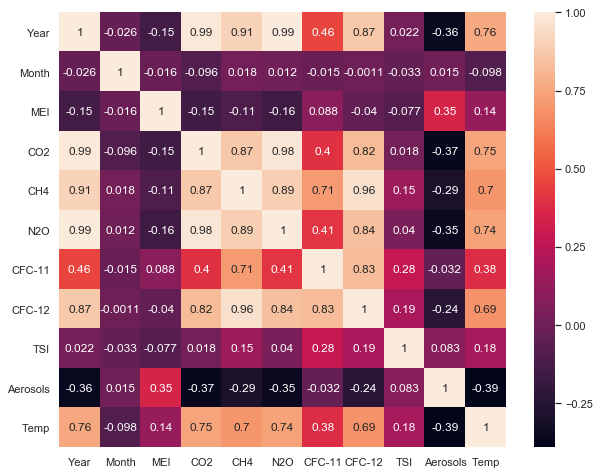

In [92]:
plt.figure()
sns.heatmap(data.corr(),annot = True)

### 1)
##### Noticing the above graph, N20 is highly correlated with temperature with corr rate .74 and it is highly correlated with CH4 and Co@ with corr values .89 and .98 respectively

### 2)	What is Multicollinearity? Does Multicollinearity exist in this Data?
##### Multicollinearity is when there's a corelation between features in the dataset.ie the features of the dataframe is dependent on another feature or all of the features

In [93]:
# checking Multicolinearity

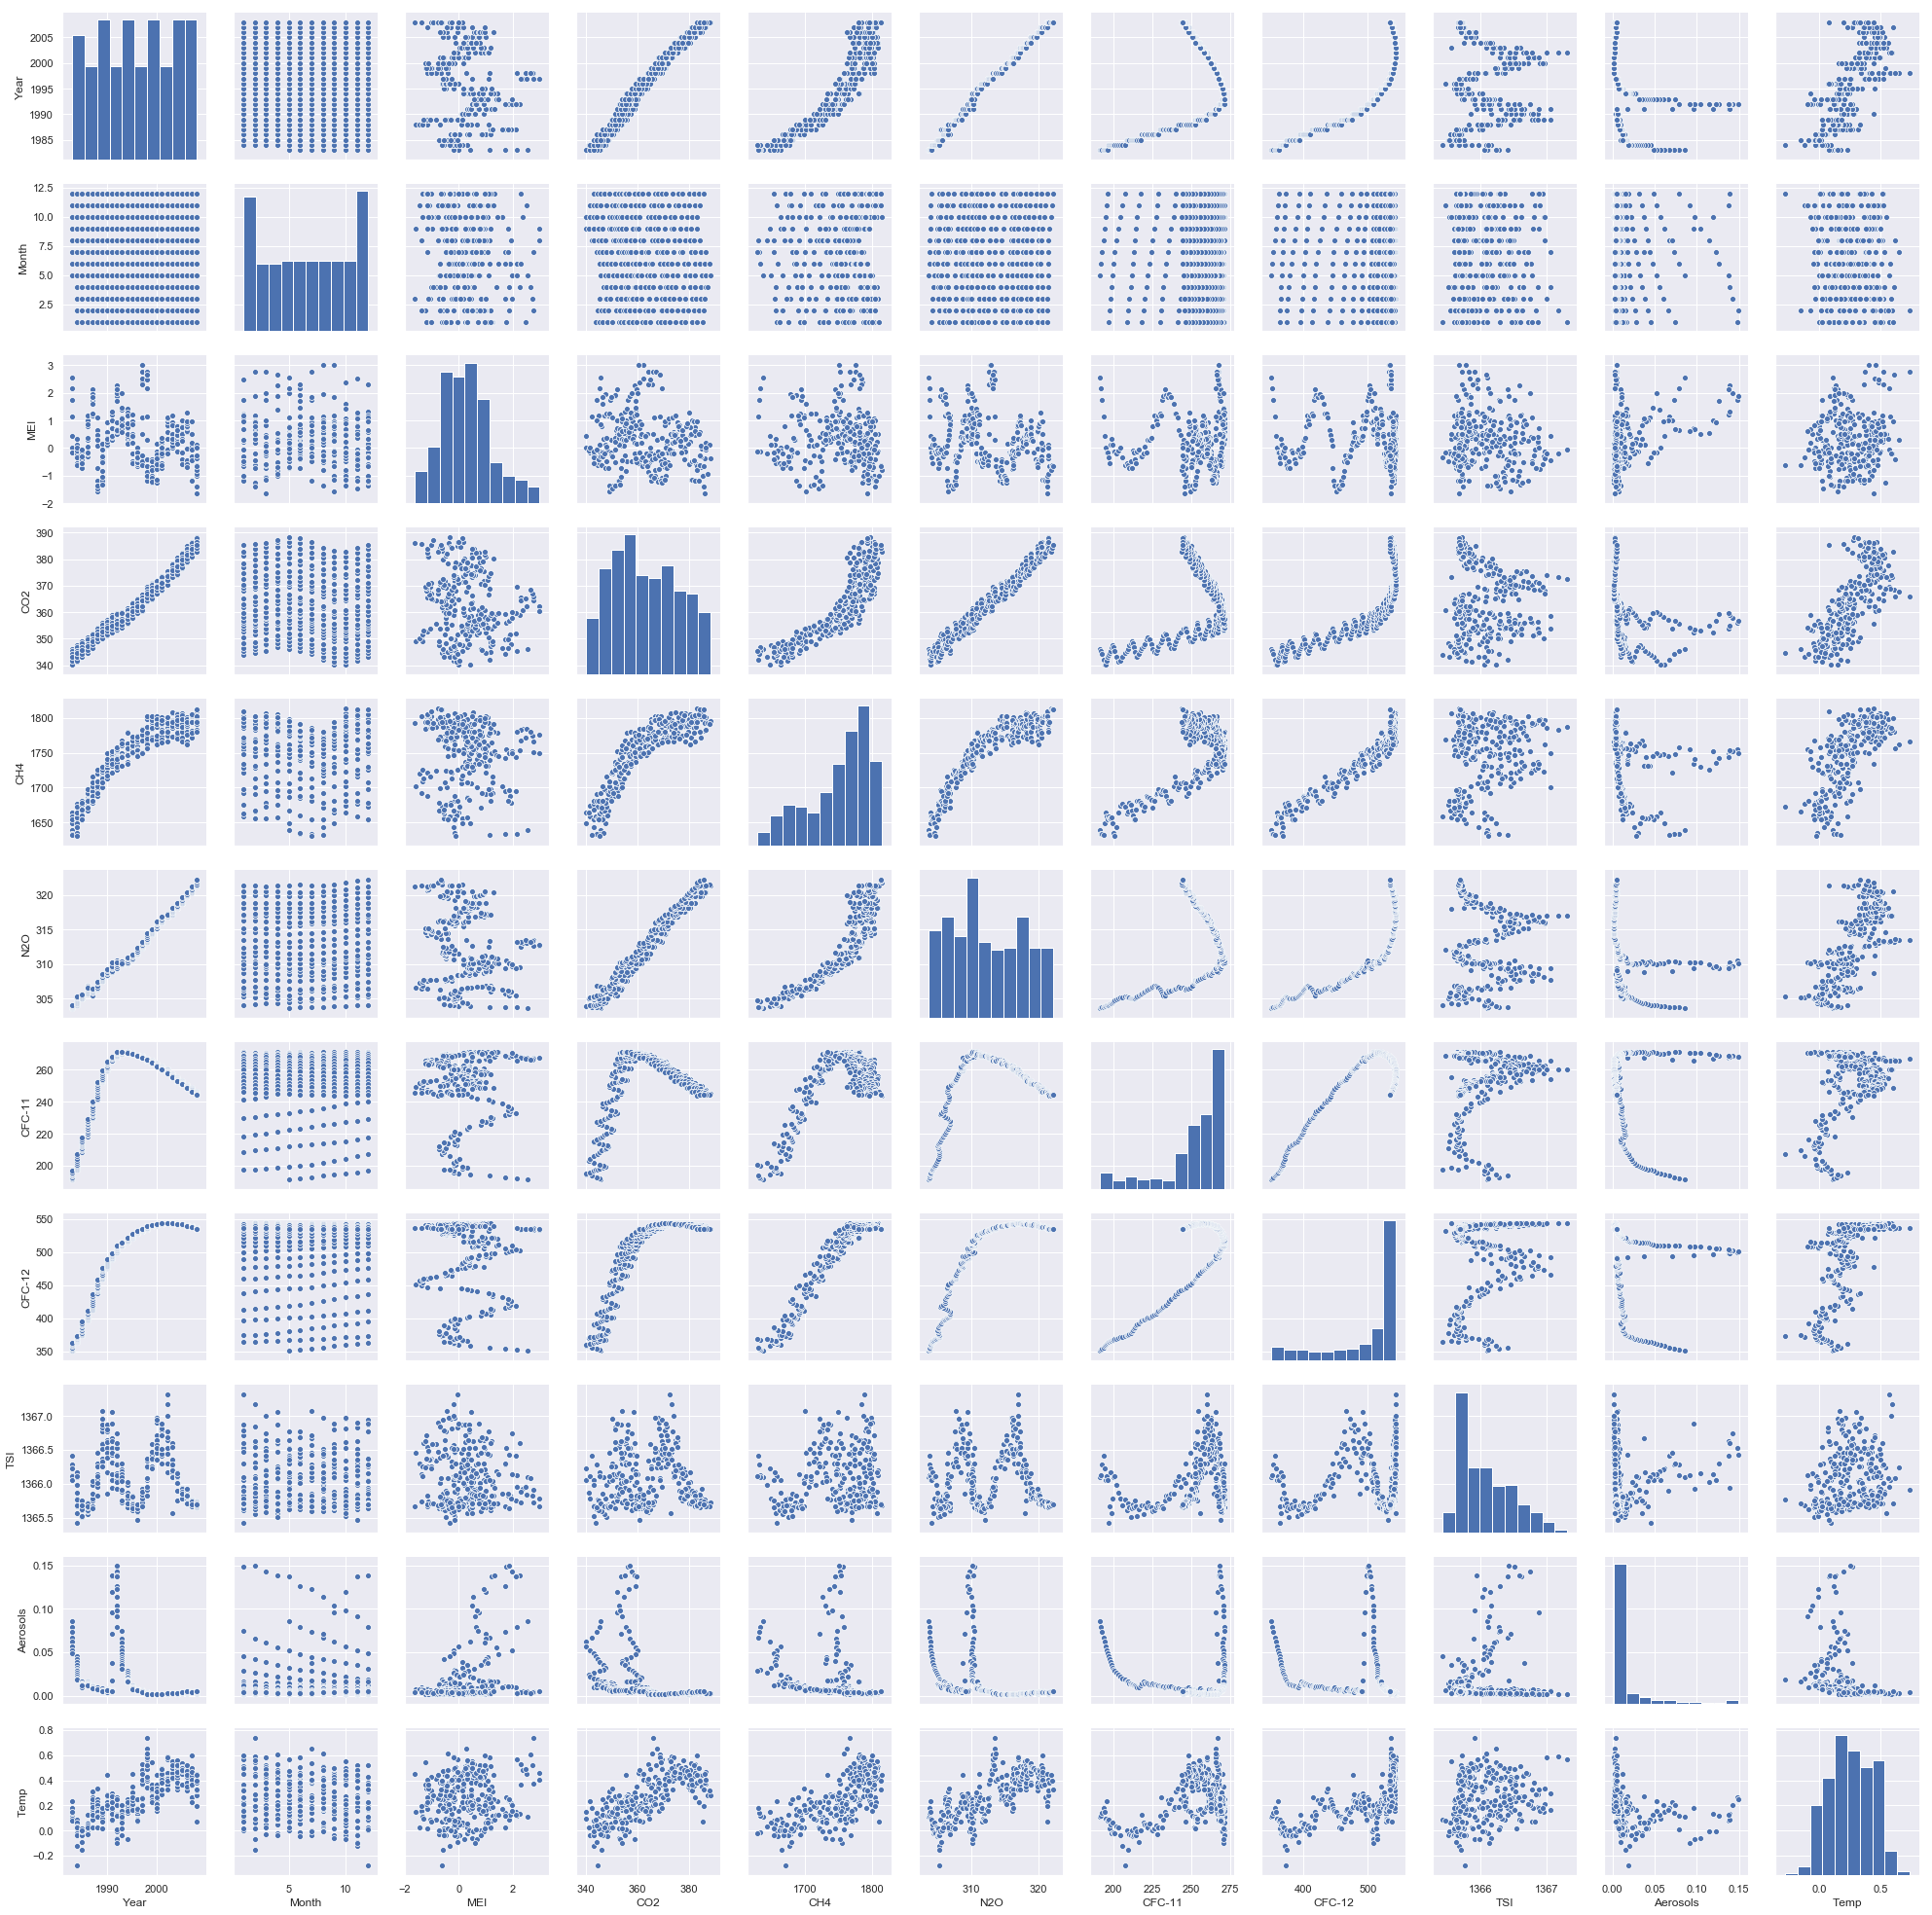

In [94]:
# let us plot pair plot for our understanding
sns.set()
sns.pairplot(data)

In [96]:
#columns
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [99]:
data.columns=['Year','Month','MEI','CO2','CH4','N2O','CFC1','CFC2','TSI','Aerosols','Temp']
data.head()

Year  Month    MEI     CO2      CH4      N2O     CFC1     CFC2        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149

In [100]:
import statsmodels.formula.api as smf
from __future__ import print_function
from patsy import dmatrices

In [102]:
# By noticing the above pair plot we cn easily confirm there is a multi collinearity.
model1 = smf.ols('Temp ~ MEI+CO2+CH4+N2O +CFC1 +CFC2+ TSI+Aerosols', data=data).fit()

In [103]:
#library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model1.model.exog

vif2 = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif2

[13454981.483446594,
 1.2256958636480382,
 27.99610328105384,
 19.12950758432084,
 61.03745302018466,
 31.829321263532037,
 93.49818247345468,
 1.1409763102540567,
 1.3544700995628356]

### VIF method
 high vif  means highly corrolated with another feature

### 3)	Which variables are highly correlated with the Dependent Variable? Is Co-relation god or bad for the Model? Why?

In [106]:
raw1=data.iloc[:,2:11]
raw1.head()

MEI     CO2      CH4      N2O     CFC1     CFC2        TSI  Aerosols  \
0  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024    0.0863   
1  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208    0.0794   
2  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850    0.0731   
3  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202    0.0673   
4  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335    0.0619   

    Temp  
0  0.109  
1  0.118  
2  0.137  
3  0.176  
4  0.149

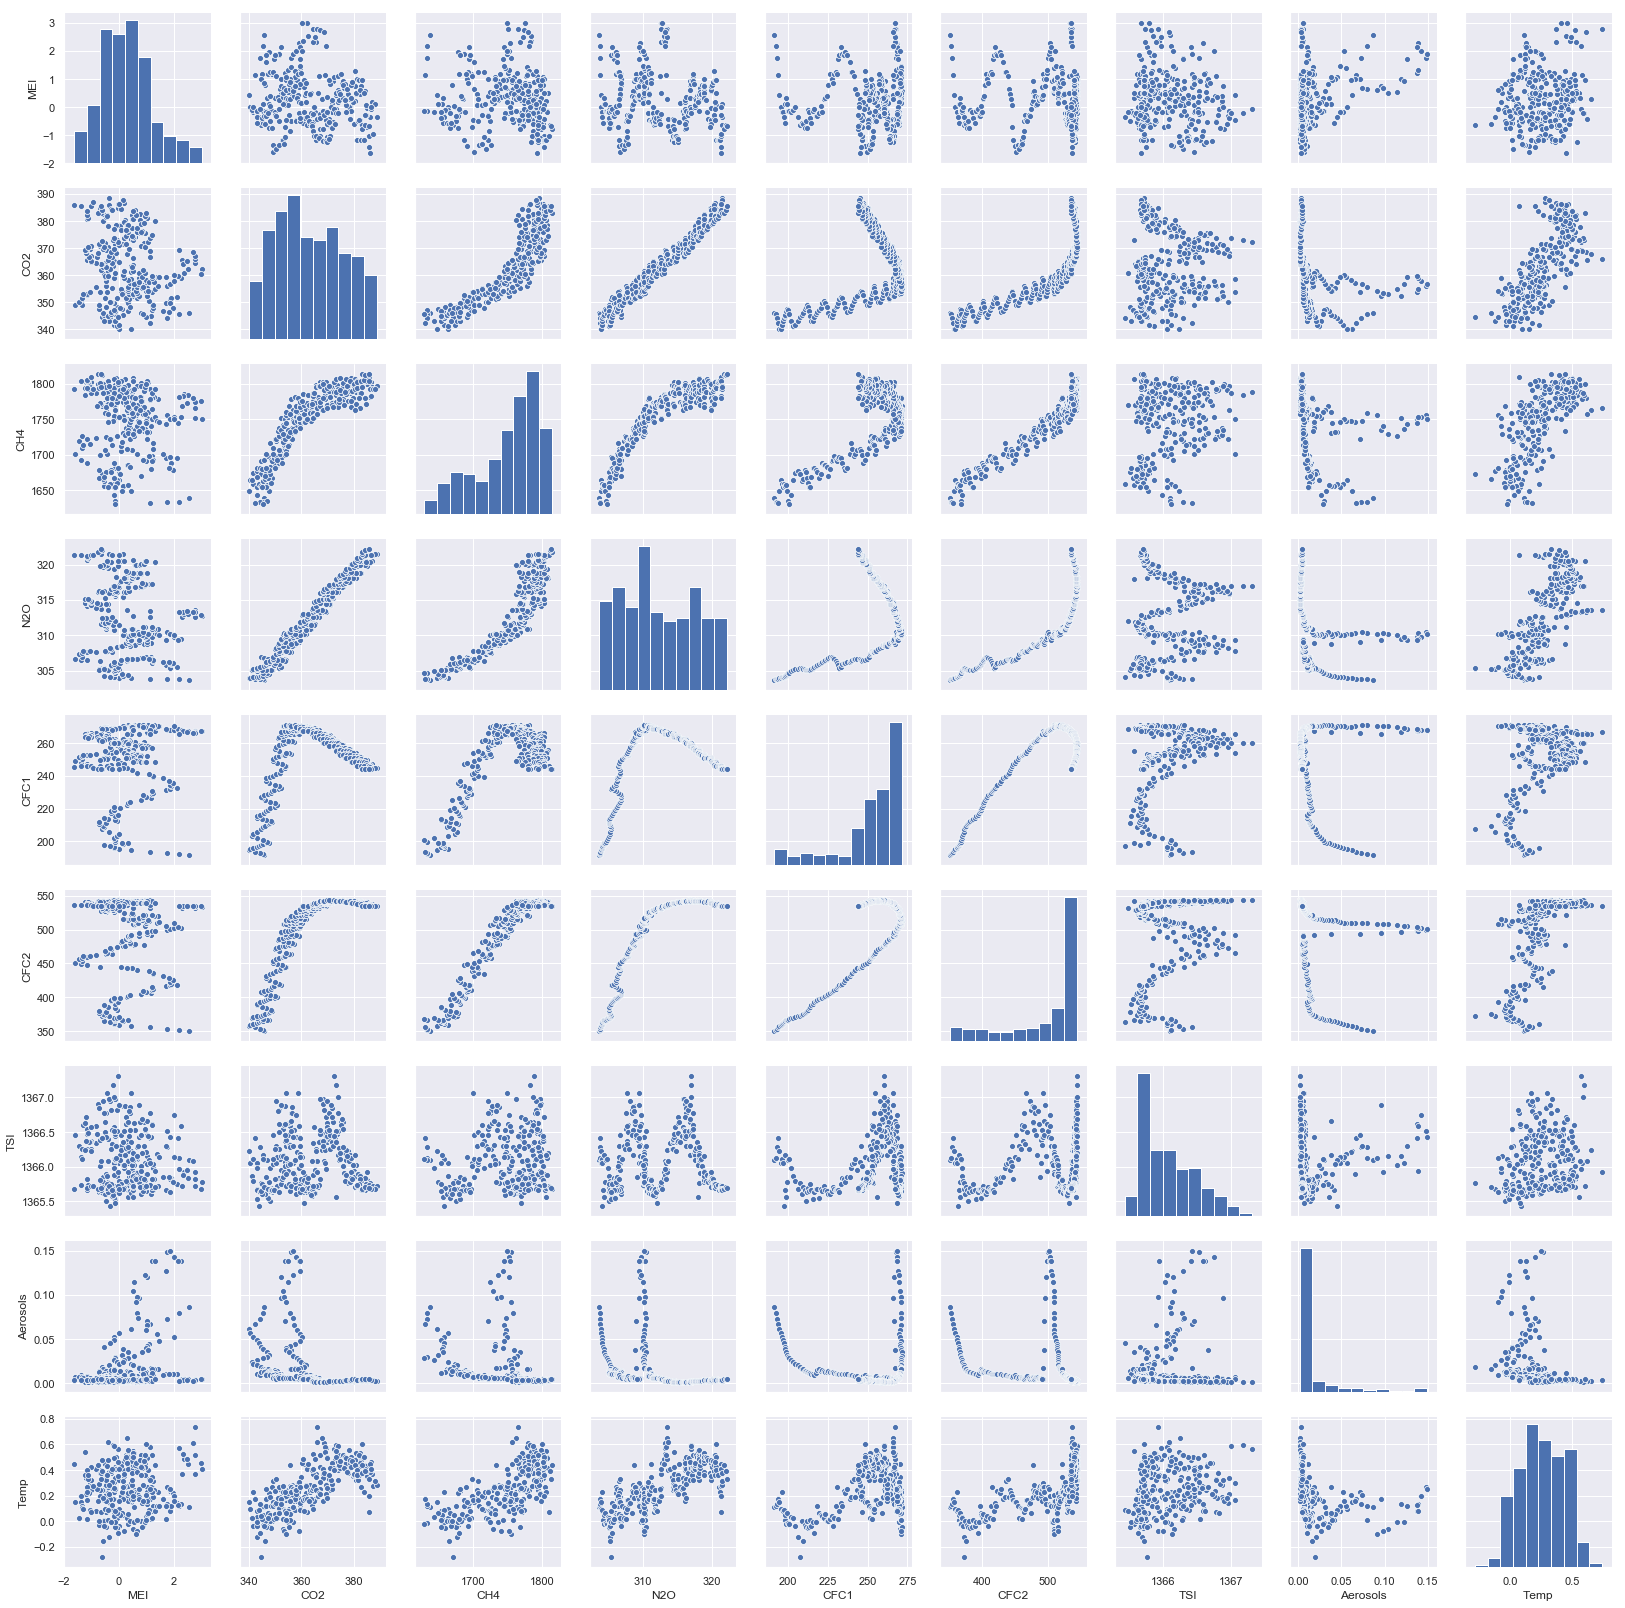

In [107]:
sns.set()
sns.pairplot(raw1)

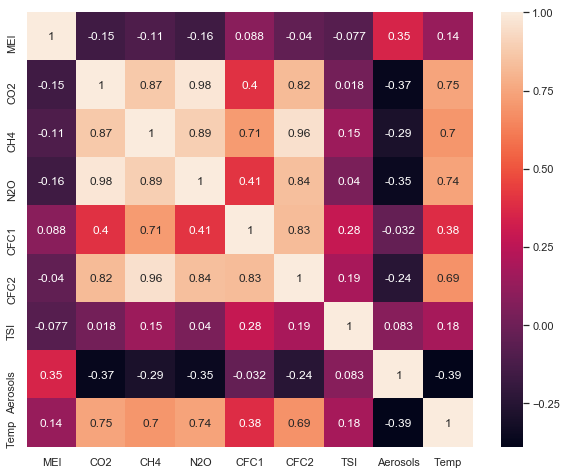

In [108]:
plt.figure()
sns.heatmap(raw1.corr(),annot = True)

##### The dependent variable temp is highly dependnet on Co2 ,ch4,n20 and cfc-12 with corr value more then .69

### 4)	What will be the prediction of a baseline Model? What will be its SSE, more commonly known as SST/TSS?

In [111]:
model1 = smf.ols('Temp ~ MEI+CO2+CH4+N2O +CFC1 +CFC2+ TSI+Aerosols', data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           8.21e-84
Time:                        16:40:58   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6958     19.191     -6.654      0.0

In [113]:
#The p value of ch4 is more than 0.05 which means there's no significance dependency on response variable.
#removing that feature.
model2 = smf.ols('Temp ~ MEI+CO2+N2O +CFC1 +CFC2+ TSI+Aerosols', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     124.5
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           7.14e-85
Time:                        16:42:04   Log-Likelihood:                 303.01
No. Observations:                 308   AIC:                            -590.0
Df Residuals:                     300   BIC:                            -560.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6250     19.151     -6.664      0.0

In [115]:
raw3=raw1.iloc[:,0:8]

In [116]:
predvalues =  model2.predict(raw3)
predvalues.head()

0    0.162886
1    0.148515
2    0.140639
3    0.114243
4    0.048742
dtype: float64

### SSE is  the square of difference of actual vlue to the predicted value

In [118]:
#RMSE
np.mean(np.square(raw1.Temp - predvalues))

0.008184708661334179

In [119]:
#SSE
sum(np.square(raw1.Temp - predvalues))

2.5208902676909273

### 5)	Build a linear regression model to predict the dependent variable Temp, using CO2, N2O, CFC.12, and Aerosols as independent variables. Find the RMSE, SSE and MAPE for the above Model. What is the model R2 (the "Multiple R-squared" value & Adjusted R2).

In [122]:
model3 = smf.ols('Temp ~ CO2+N2O +CFC2+Aerosols', data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.81e-58
Time:                        16:44:23   Log-Likelihood:                 232.93
No. Observations:                 308   AIC:                            -455.9
Df Residuals:                     303   BIC:                            -437.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9781      1.198     -2.485      0.0

In [123]:
#Observe the R2 and Adj. R2 values

In [124]:
#subset from original data
columns = ['CO2', 'N2O', 'CFC2', 'Aerosols']
sliced = pd.DataFrame(raw3, columns=columns) 
sliced.head()

CO2      N2O     CFC2  Aerosols
0  345.96  303.677  350.113    0.0863
1  345.52  303.746  351.848    0.0794
2  344.15  303.795  353.725    0.0731
3  342.25  303.839  355.633    0.0673
4  340.17  303.901  357.465    0.0619

In [125]:
predvalues1 =  model3.predict(sliced) # predict out of sample
predvalues1.head()

0   -0.044721
1   -0.039437
2   -0.040265
3   -0.044750
4   -0.050715
dtype: float64

In [127]:
#RMSE
np.mean(np.square(raw1.Temp - predvalues1))

0.012901885489799026

In [131]:
#SSE
sum(np.square(raw1.Temp - predvalues1))

3.9737807308581

In [134]:
#MAPE
np.mean(np.square(raw1.Temp - predvalues1))

0.012901885489799026

In [135]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(raw1.Temp, predvalues1)
    

159.49003764897546

### 6)	Calculate R2 value manually using the formulae for R2. Both should match.

### R2 = 1-(SSE/SST)

In [137]:
m=raw1.Temp.mean()
SST=sum(raw1.Temp-m)
SST

4.9960036108132044e-15

In [138]:
SSE

3.9737807308581

In [143]:
R2= 1-(SSE/SST)
R2

-795391885277536.6

### 7)	Find the correlation between the actual & predicted values of Temp. Square this number and you should get the Multiple R2. This is another quick way to compute R2. ( R2= correlation(actual, predicted values)^2)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


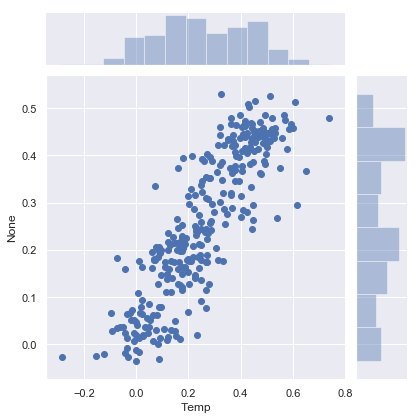

In [144]:
sns.jointplot(raw1.Temp,predvalues)

In [147]:
co=raw1.Temp.corr(predvalues)
co

0.8625427101889532

In [146]:
r2=np.square(c)
r2

0.7439799269001046

### 8)	What is the Hypothesis test in case of a Linear Regression?

##### imagine the best fit line y=mx+c,
here hypothesis test is done in the following

#### h0: m=0 (null hypothesis)
#### ha: m!=0 (alternative hypothesis)
   #### then check the p values 
    

##### in linear regression ,all the features are assumes to null hypothsis.

### 9)	What do the P values represent? Do we look for low or High P values? Why?

##### P value is checked to reject the null hypothesis.If p values is more than .05 then we failed to reject null hypothesis(i.e variable is insignificant)
##### If P value is less then .05 then we reject the null hypothesis.(i.e variable is significant)

### 10)	What is an F Test in Linear Regression? Discuss.

##### F test is done on linear regression to reject the null hypothesis.
##### Based on the F value we get ,we can find the P value since with the help of p value we can reject or fail to reject the null hypothesis